## Plus/Minus Analysis

#### Overview

This notebook examines the plus/minus metric for players from Partizan Mozzart Bet Belgrade during the 2022/23 season, focusing on their impact across the regular season and playoffs.

- **Plus/minus** is a critical statistic in basketball that measures a player’s direct influence on the game by calculating the point differential when they are on the court - positive values indicate the team outscores opponents, while negative values suggest the opposite.
- **This metric is highly valued because it captures a player’s overall contribution beyond traditional box score stats like points or rebounds, reflecting their ability to impact winning through defense, playmaking, and intangible factors such as spacing, decision-making, and teamwork.**

In high-stakes contexts like the playoffs, plus/minus can reveal which players elevate their performance under pressure, making it an essential tool for coaches and analysts to assess lineup effectiveness and strategic adjustments. The analysis calculates average plus/minus for all games, compares performance between the regular season and playoffs, validates specific players’ stats, and includes a line plot to visualize differences, offering actionable insights for optimizing team performance.

In [25]:
import pandas as pd

file_path = "../data/partizan_2022_cleaned.csv"

df = pd.read_csv(file_path)

Separating player and team data allows for focused analysis on individual player performance while retaining team-level data for potential future use.

In [26]:
# filter 
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
team = df[df['player'] == 'PARTIZAN MOZZART BET BELGRADE'].copy()

Splitting the data by phase enables a comparison of player performance between the regular season and playoffs, which can reveal how players perform under different competitive pressures.

In [27]:
# split data into regular season and playoffs
regular_players = players[players['phase'] == 'REGULAR SEASON'].copy()
playoff_players = players[players['phase'] == 'PLAYOFFS'].copy()

This step aims to identify which players have the greatest positive impact on the game, as measured by their average plus/minus across all games.

In [28]:
# average plus/minus per player
avg_pm = players.groupby('player')['plus_minus'].mean()


top_pm = avg_pm.sort_values(ascending=False).head(5)
print("\nTop 5 Players by Average Plus/Minus (All Games):")
print(top_pm)


Top 5 Players by Average Plus/Minus (All Games):
player
Avramovic Aleksa    3.666667
Punter Kevin        3.000000
Lessort Mathias     2.947368
Exum Dante          2.657895
Leday Zach          2.051282
Name: plus_minus, dtype: float64


- **Avramovic Aleksa** leads with an average plus/minus of 3.67, indicating a significant positive impact when on the court.  
- **Punter Kevin** (3.00), **Lessort Mathias** (2.95), **Exum Dante** (2.66), and **Leday Zach** (2.05) also show positive impacts, suggesting they are key contributors to the team’s performance across the season.

The purpose of this is to verify the plus/minus calculation for a specific player (Avramovic Aleksa) and provide additional context about their playing time and game participation.

In [29]:
# validate a specific player
player_to_check = 'Avramovic Aleksa'
check_player = players[players['player'] == player_to_check]
if check_player.empty:
    print(f"\n{player_to_check} has no games in the dataset")
else:
    raw_mean_pm = check_player['plus_minus'].mean()
    total_seconds = check_player['total_seconds'].sum()
    num_games = len(check_player)
    
    print(f"\nCheck for {player_to_check}:")
    print(f"Average Plus/Minus: {raw_mean_pm:.2f}")
    print(f"Total Seconds Played: {total_seconds:.0f}")
    print(f"Number of Games: {num_games}")


Check for Avramovic Aleksa:
Average Plus/Minus: 3.67
Total Seconds Played: 19349
Number of Games: 24




- The average plus/minus of 3.67 for **Avramovic Aleksa** matches the value from Step 4, confirming the calculation’s accuracy.  
- With 19,349 seconds played (approximately 322 minutes, or 13.4 minutes per game) across 24 games, Avramovic appears to be a rotation player who consistently contributes positively to the team’s point differential.

This step aims to compare player performance between the regular season and playoffs, identifying which players improved or declined in the playoffs. The visualization highlights these differences for better interpretation.

In [30]:
# filter players with minimum average seconds per game
min_seconds_per_game = 600
regular_filtered = regular_players.groupby('player').filter(lambda x: x['total_seconds'].mean() >= min_seconds_per_game)
playoff_filtered = playoff_players.groupby('player').filter(lambda x: x['total_seconds'].mean() >= min_seconds_per_game)

# average plus/minus per player
regular_avg_pm = regular_filtered.groupby('player')['plus_minus'].mean()
playoff_avg_pm = playoff_filtered.groupby('player')['plus_minus'].mean()

# combine into a DataFrame
combined_pm = pd.DataFrame({
    'pm_regular': regular_avg_pm,
    'pm_playoff': playoff_avg_pm
}).fillna(0)

# calculate difference
combined_pm['pm_diff'] = combined_pm['pm_playoff'] - combined_pm['pm_regular']



top_pm_diff = combined_pm.sort_values('pm_diff', ascending=False).head(5)
print("\nTop 5 Players by Plus/Minus Difference (Playoffs - Regular Season:)")
print(top_pm_diff)


Top 5 Players by Plus/Minus Difference (Playoffs - Regular Season:)
                pm_regular  pm_playoff   pm_diff
player                                          
Smailagic Alen   -0.160000         3.2  3.360000
Punter Kevin      2.823529         5.0  2.176471
Nunnally James    0.666667         0.6 -0.066667
Madar Yam        -0.176471        -0.6 -0.423529
Leday Zach        2.117647         1.6 -0.517647




- **Smailagic Alen** shows the largest improvement (+3.36), with his plus/minus rising from -0.16 in the regular season to 3.2 in the playoffs, indicating a significant positive impact in the postseason.  
- **Punter Kevin** also improved (+2.18), increasing from 2.82 to 5.0, making him a key performer in the playoffs.  
- **Leday Zach**, **Madar Yam**, and **Nunnally James** experienced declines, with Leday’s plus/minus dropping from 2.12 to 1.6 (-0.52), suggesting a reduced impact in the playoffs.

Generate a line plot to visualize Plus/Minus trend.

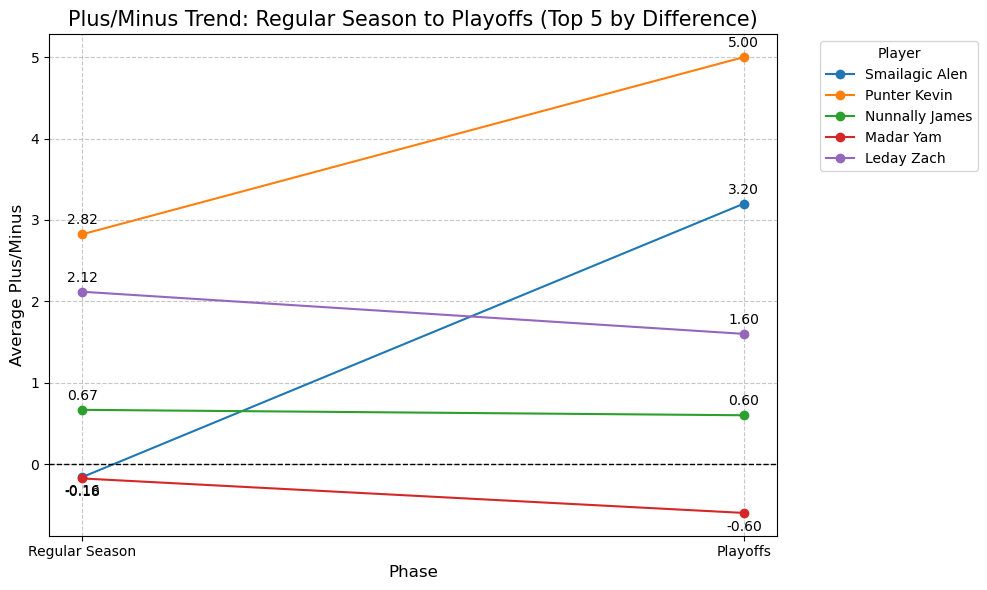

In [31]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 players by pm_diff
top_pm_diff = combined_pm.sort_values('pm_diff', ascending=False).head(5)

# Prepare data for line plot
plot_data = top_pm_diff[['pm_regular', 'pm_playoff']].reset_index()
plot_data = plot_data.melt(id_vars='player', value_vars=['pm_regular', 'pm_playoff'], 
                           var_name='Phase', value_name='Plus/Minus')
plot_data['Phase'] = plot_data['Phase'].replace({'pm_regular': 'Regular Season', 'pm_playoff': 'Playoffs'})

# Create the line plot
plt.figure(figsize=(10, 6))
for player in top_pm_diff.index:
    player_data = plot_data[plot_data['player'] == player]
    plt.plot(player_data['Phase'], player_data['Plus/Minus'], marker='o', label=player)

# Customize the plot
plt.xlabel('Phase', size=12)
plt.ylabel('Average Plus/Minus', size=12)
plt.title('Plus/Minus Trend: Regular Season to Playoffs (Top 5 by Difference)', size=15)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels on the points
for i, row in plot_data.iterrows():
    plt.annotate(f'{row["Plus/Minus"]:.2f}', (row['Phase'], row['Plus/Minus']),
                 ha='center', va='bottom' if row['Plus/Minus'] >= 0 else 'top',
                 xytext=(0, 5 if row['Plus/Minus'] >= 0 else -5), textcoords='offset points')

plt.tight_layout()
plt.show()

**A line plot showing the change in plus/minus from regular season to playoffs for each of the top 5 players by plus/minus difference. Each player has a line connecting their regular season and playoff plus/minus values, with markers at each point to emphasize the values.**

This step verifies the plus/minus difference for Smailagic Alen, who showed the largest improvement, by examining his performance in each phase separately.

In [32]:
# validate a specific player
player_to_check = 'Smailagic Alen'
for phase_name, phase_df in [('Regular Season', regular_players), ('Playoffs', playoff_players)]:
    check_player = phase_df[phase_df['player'] == player_to_check]
    if check_player.empty:
        print(f"\n{player_to_check} has no games in {phase_name}")
        continue
    raw_mean_pm = check_player['plus_minus'].mean()
    total_seconds = check_player['total_seconds'].sum()
    num_games = len(check_player)
    
    
    
    print(f"\nCheck for {player_to_check} - {phase_name}:")
    print(f"Average Plus/Minus: {raw_mean_pm:.2f}")
    print(f"Total Seconds Played: {total_seconds:.0f}")
    print(f"Number of Games: {num_games}")


Check for Smailagic Alen - Regular Season:
Average Plus/Minus: -0.16
Total Seconds Played: 15677
Number of Games: 25

Check for Smailagic Alen - Playoffs:
Average Plus/Minus: 3.20
Total Seconds Played: 3649
Number of Games: 5




- In the regular season, **Smailagic Alen** had a slightly negative plus/minus of -0.16 over 15,677 seconds (approximately 627 minutes, or 25 minutes per game) across 25 games, indicating a minor negative impact.  
- In the playoffs, his plus/minus improved to 3.20 over 3,649 seconds (approximately 61 minutes, or 12.2 minutes per game) across 5 games, confirming his significant positive contribution in the postseason, as seen in the plus/minus difference.

## Conclusion

### Key Findings

The plus/minus analysis for Partizan Mozzart Bet Belgrade in the 2022/23 season reveals several key insights:

- **Avramovic Aleksa (3.67), Punter Kevin (3.00), Lessort Mathias (2.95), Exum Dante (2.66), and Leday Zach (2.05)** were the top performers by average plus/minus across all games, indicating their consistent positive impact on the team’s point differential.
- **Smailagic Alen** showed the most significant improvement in the playoffs, with his plus/minus increasing from -0.16 to 3.20 (+3.36 difference), suggesting he thrived in high-pressure situations.
- **Punter Kevin** also improved in the playoffs (+2.18), with his plus/minus rising from 2.82 to 5.0, reinforcing his role as a key contributor.
- **Leday Zach, Madar Yam, and Nunnally James** experienced declines in the playoffs, with Leday’s plus/minus dropping from 2.12 to 1.6 (-0.52), indicating a need for further investigation into their playoff performance.

### Strategic Implications

- **Smailagic Alen and Punter Kevin** should be prioritized in playoff scenarios, given their improved performance under pressure.
- **Avramovic Aleksa’s** consistent positive impact (3.67 plus/minus) suggests he deserves more minutes, especially in close games.
- **Leday Zach’s** decline in the playoffs warrants a review of his role, matchups, or shot selection to improve his impact in critical games.
- **Madar Yam’s** negative plus/minus in both phases (-0.18 to -0.60) indicates he may need a different role or additional support to contribute effectively.
 